In [2]:
# Copyright 2019 The TensorFlow Authors All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

In [3]:
# Visualization of the YAMNet audio event classification model.
# See https://github.com/tensorflow/models/tree/master/research/audioset/yamnet/

In [2]:
# Imports.
import numpy as np
import soundfile as sf

import matplotlib.pyplot as plt

import params
import yamnet as yamnet_model
import tensorflow as tf

In [15]:
# Read in the audio.
# You can get this example waveform via:
# curl -O https://storage.googleapis.com/audioset/speech_whistling2.wav

wav_file_name = 'WhatsApp_Ptt_2020-05-23_at_130202.wav'

wav_data, sr = sf.read(wav_file_name, dtype=np.int16)
waveform = wav_data / 32768.0
# The graph is designed for a sampling rate of 16 kHz, but higher rates 
# should work too.
params.SAMPLE_RATE = sr
print("Sample rate =", params.SAMPLE_RATE)

Sample rate = 48000


In [16]:
# Set up the YAMNet model.
class_names = yamnet_model.class_names('yamnet_class_map.csv')
params.PATCH_HOP_SECONDS = 0.1  # 10 Hz scores frame rate.
graph = tf.Graph()
with graph.as_default():
    yamnet = yamnet_model.yamnet_frames_model(params)
    yamnet.load_weights('yamnet.h5')

In [17]:
# Run the model.
with graph.as_default():
    scores, spectrogram = yamnet.predict(np.reshape(waveform, [1, -1]), steps=1)

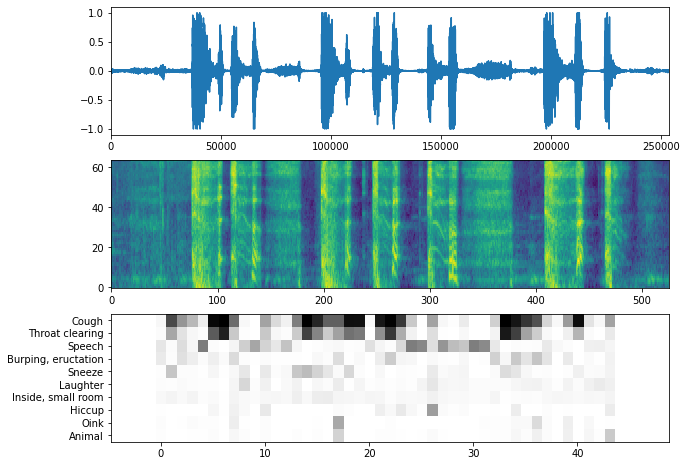

In [18]:
# Visualize the results.
plt.figure(figsize=(10, 8))

# Plot the waveform.
plt.subplot(3, 1, 1)
plt.plot(waveform)
plt.xlim([0, len(waveform)])
# Plot the log-mel spectrogram (returned by the model).
plt.subplot(3, 1, 2)
plt.imshow(spectrogram.T, aspect='auto', interpolation='nearest', origin='bottom')

# Plot and label the model output scores for the top-scoring classes.
mean_scores = np.mean(scores, axis=0)
top_N = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_N]
plt.subplot(3, 1, 3)
plt.imshow(scores[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')
# Compensate for the PATCH_WINDOW_SECONDS (0.96 s) context window to align with spectrogram.
patch_padding = (params.PATCH_WINDOW_SECONDS / 2) / params.PATCH_HOP_SECONDS
plt.xlim([-patch_padding, scores.shape[0] + patch_padding])
# Label the top_N classes.
yticks = range(0, top_N, 1)
plt.yticks(yticks, [class_names[top_class_indices[x]] for x in yticks])
_ = plt.ylim(-0.5 + np.array([top_N, 0]))


In [19]:
top_class_indices
class_names[top_class_indices]

array(['Cough', 'Throat clearing', 'Speech', 'Burping, eructation',
       'Sneeze', 'Laughter', 'Inside, small room', 'Hiccup', 'Oink',
       'Animal'], dtype='<U40')

In [5]:
import os
params.PATCH_HOP_SECONDS = 0.1  # 10 Hz scores frame rate.

dir_path = "/home/eric/Repos/covid/ml/covidscipy2020/machine_learning/Cough_NoCough_classification/yamnet"
for file in os.listdir(dir_path):
    if file.endswith(".wav"):
        file_path = os.path.join(dir_path, file)
        wav_data, sr = sf.read(file_path, dtype=np.int16)
        waveform = wav_data / 32768.0
        params.SAMPLE_RATE = sr
        class_names = yamnet_model.class_names('yamnet_class_map.csv')
        params.PATCH_HOP_SECONDS = 0.1  # 10 Hz scores frame rate.
        graph = tf.Graph()
        with graph.as_default():
            yamnet = yamnet_model.yamnet_frames_model(params)
            yamnet.load_weights('yamnet.h5')
        with graph.as_default():
            scores, spectrogram = yamnet.predict(np.reshape(waveform, [1, -1]), steps=1)
        mean_scores = np.mean(scores, axis=0)
        top_N = 10
        top_class_indices = np.argsort(mean_scores)[::-1][:top_N]
        print(f"File: {file}")
        print(f"\t 1. {class_names[top_class_indices]}")

File: WhatsApp_Ptt_2020-05-23_at_130202.wav
	 1. ['Cough' 'Throat clearing' 'Speech' 'Burping, eructation' 'Sneeze'
 'Laughter' 'Inside, small room' 'Hiccup' 'Oink' 'Animal']
File: WhatsApp_Ptt_2020-05-23_at_130449.wav
	 1. ['Cough' 'Throat clearing' 'Speech' 'Hiccup' 'Burping, eructation'
 'Sneeze' 'Inside, small room' 'Laughter' 'Domestic animals, pets' 'Dog']
File: WhatsApp_Audio_2020-05-23_at_175518.wav
	 1. ['Speech' 'Screaming' 'Crying, sobbing' 'Dog' 'Domestic animals, pets'
 'Groan' 'Whimper' 'Inside, small room' 'Animal' 'Laughter']
File: WhatsApp_Ptt_2020-05-23_at_130142.wav
	 1. ['Cough' 'Throat clearing' 'Hiccup' 'Burping, eructation' 'Sneeze'
 'Laughter' 'Speech' 'Inside, small room' 'Snicker' 'Chuckle, chortle']
File: WhatsApp_Ptt_2020-05-23_at_135259.wav
	 1. ['Speech' 'Whack, thwack' 'Groan' 'Cough' 'Burst, pop' 'Sound effect'
 'Explosion' 'Sigh' 'Throat clearing' 'Bang']
File: WhatsApp_Ptt_2020-05-23_at_135237.wav
	 1. ['Speech' 'Beatboxing' 'Whack, thwack' 'Explosion'